# Hypothesis Testing

> *With the data visualization, it was possible to notice a difference in the median of the final grades grouping by gender, type of school, income and age group. In this step, let's check if the differences are statistically significant.*

In [1]:
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
microdata = pd.read_csv('database/MICRODADOS_ENEM_2021_v2.csv', 
                        sep = ';', 
                        encoding='latin-1')

Checking if the sample is normally distributed

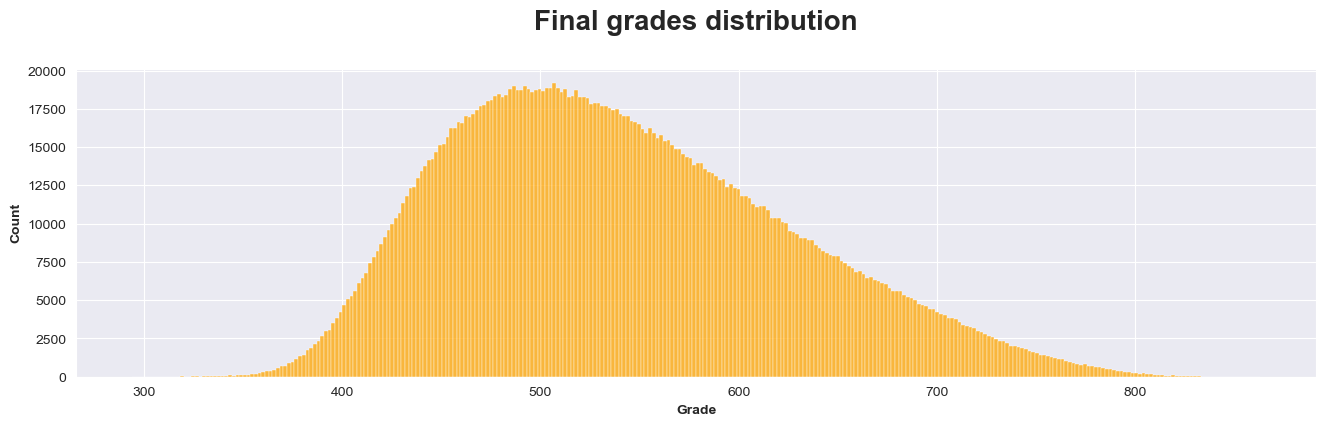

In [3]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,4))

ax = sns.histplot(x = 'final_grade', 
                 data = microdata,
                 color = 'orange')

ax.set_title('Final grades distribution', 
             fontweight = 'bold', 
             fontsize = 20,
             y = 1.1)

ax.set_xlabel('Grade', 
              fontweight = 'bold')

ax.set_ylabel('Count', 
              fontweight = 'bold')

ax = ax

In [4]:
stat_test, p_value = normaltest(microdata['final_grade'])
print(f'P-value: {p_value}')

P-value: 0.0


Since the p value is lower than 0.05, we can reject the null hypothesis of normal distribution. Thus, we'll need to do the hypothesis testings with a non parametric test, such as the Mann-Whitney test.

## Differences in the median grades by gender

Testing if there's difference between the final grades by gender.

In [5]:
group_1 = microdata['final_grade'][microdata['gender'] == "M"]
group_2 = microdata['final_grade'][microdata['gender'] == "F"]

print(f'Median final grade of the male students: {round(microdata["final_grade"][microdata["gender"] == "M"].median(),2)}.')
print(f'Median final grade of the female students: {round(microdata["final_grade"][microdata["gender"] == "F"].median(),2)}.')
print(f'P-value: {mannwhitneyu(group_1, group_2, alternative = "greater")[1]}.') 

Median final grade of the male students: 541.9.
Median final grade of the female students: 524.06.
P-value: 0.0.


Since the p value is lower than 0.05, we can reject the null hypothesis of the same median. Thus, we can affirm that the median final grade of male students is statistically significant greater than the median final grade of female students.

## Differences in the median grades by type of school

Testing if there's difference between the final grades by type of school.

In [6]:
group_1 = microdata['final_grade'][microdata['school'] == "Private"]
group_2 = microdata['final_grade'][microdata['school'] == "Public"]

print(f'Median final grade of the private school students: {round(group_1.median(),2)}.')
print(f'Median final grade of the public school students: {round(group_2.median(),2)}.')
print(f'P-value: {mannwhitneyu(group_1, group_2, alternative = "greater")[1]}.') 

Median final grade of the private school students: 601.52.
Median final grade of the public school students: 506.66.
P-value: 0.0.


Since the p value is lower than 0.05, we can reject the null hypothesis of the same median. Thus, we can affirm that the median final grade of private school students is statistically significant greater than the median final grade of public school students.

## Differences in the median grades by income

Testing if there's difference between the final grades of the income group "up to 1 minimum wage" and "between 1 and 5 minimum wages".

In [7]:
group_1 = microdata['final_grade'][microdata['income'] == "Up to 1 minimum wage"]
group_2 = microdata['final_grade'][microdata['income'] == "Between 1 and 5 minimum wages"]

print(f'Median final grade of the income group "up to 1 minimum wage": {round(group_1.median(),2)}.')
print(f'Median final grade of the income group "between 1 and 5 minimum wages": {round(group_2.median(),2)}.')
print(f'P-value: {mannwhitneyu(group_1, group_2, alternative = "less")[1]}.') 

Median final grade of the income group "up to 1 minimum wage": 490.04.
Median final grade of the income group "between 1 and 5 minimum wages": 535.56.
P-value: 0.0.


Since the p value is lower than 0.05, we can reject the null hypothesis of the same median. Thus, we can affirm that the median final grade of the students with income up to 1 minimum wage is statistically significant less than the median final grade of students with income between 1 and 5 minimum wages.

## Differences in the median grades by age groups

Testing if there's difference between the final grades of the age group "under 20" and "between 21 and 30".

In [8]:
group_1 = microdata['final_grade'][microdata['age'] == "Under 20"]
group_2 = microdata['final_grade'][microdata['age'] == "Between 20 and 30"]

print(f'Median final grade of the age group "under 20": {round(group_1.median(),2)}.')
print(f'Median final grade of the age group "between 20 and 30": {round(group_2.median(),2)}.')
print(f'P-value: {mannwhitneyu(group_1, group_2, alternative = "greater")[1]}.') 

Median final grade of the age group "under 20": 533.8.
Median final grade of the age group "between 20 and 30": 529.3.
P-value: 1.6491912095494267e-53.


Since the p value is lower than 0.05, we can reject the null hypothesis of the same median. Thus, we can affirm that the median final grade of the students under 20 is statistically significant greater than the median final grade of the students between 20 and 30.

To have an example of a case that we can not reject the null hypothesis, let's test the difference between the final grades of the age group "between 41 and 50" and "between 51 and 60", which median grades are pretty close.

In [9]:
group_1 = microdata['final_grade'][microdata['age'] == "Between 41 and 50"]
group_2 = microdata['final_grade'][microdata['age'] == "Between 51 and 60"]

print(f'Median final grade of the age group "between 41 and 50": {round(group_1.median(),2)}.')
print(f'Median final grade of the age group "between 51 and 60": {round(group_2.median(),2)}.')
print(f'P-value: {mannwhitneyu(group_1, group_2, alternative = "greater")[1]}.') 

Median final grade of the age group "between 41 and 50": 495.5.
Median final grade of the age group "between 51 and 60": 495.06.
P-value: 0.06325912609143722.


In this case, the p value is greater than 0.05, which means we can accept the null hypothesis of the same median with the significance level of 5%.

## Conclusion

The tests carried out confirmed most of the conclusions that were previously observed through graphs. However, not all differences observed were statistically significant, reinforcing the importance of not only graphically analyzing, but also performing statistical tests to confirm the hypotheses created.